In [1]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [2]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [3]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [4]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [5]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [6]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [6]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
# text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
# text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
# text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [7]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so
Encoded Text: okcpc ycpc ncoocp ucwuc qw okc ume scjkmwqj cdcpjquc gx ecocpsqwqwi okc pcmugw gx qou mnucwjc ykcpc qo qu wgo qw okc wgtcau gx okc amuo khwepce lcmpu okcpc mpc tmuo whsncpu gx lghwi ameqcu yqok ykgs qo sqiko nc m zacmuhpc og xmaa qw agtc okcpc mpc mo acmuo xqtc yqok ykgs mu qo uccsu og sc wg smw gx omuoc mwe uzqpqo jmw kcaz egqwi ug
Decoded Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to 

In [9]:
# break the cipher with MCMC using only one starting point
cipher_breaker = CipherBreaker(
    cipher_generator=cipher_generator,
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=100000, print_interval=100)

Iter 0: hunyn lnyn snhhny gnzgn iz hun gaq tnvuaziv nonyvign bm qnhnytizizp hun ynagbz bm ihg asgnzvn lunyn ih ig zbh iz hun zbenkg bm hun kagh uxzqynq fnayg hunyn ayn eagh zxtsnyg bm fbxzp kaqing lihu lubt ih tipuh sn a cknagxyn hb makk iz kben hunyn ayn ah knagh mien lihu lubt ag ih gnntg hb tn zb taz bm haghn azq gciyih vaz unkc qbizp gb
Iter 100: there were better sense in the sad mechanic evercise of determining the reason of its absence where it is not in the nopels of the last hundred years there are past numbers of young ladies with whom it might be a kleasure to fall in lope there are at least fipe with whom as it seems to me no man of taste and skirit can helk doing so
Iter 200: there were better sense in the sad mechanic eyercise of determining the reason of its absence where it is not in the novels of the last hundred pears there are vast numbers of poung ladies with whom it might be a kleasure to fall in love there are at least five with whom as it seems to me no man of ta

In [ ]:
cipher_breaker.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

In [8]:
# break the cipher with MCMC using 5 starting points
cipher_breaker_nstart = CipherBreaker(
    cipher_generator=cipher_generator,
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)
cipher_breaker_nstart.break_cipher_nstart(
    iterations=100000, print_interval=100, nstart=5
)

Iter 0 of start 1: cfjij ojij vjccji ljklj uk cfj lxa njbfxkub jtjibulj we ajcjinukukg cfj ijxlwk we ucl xvljkbj ofjij uc ul kwc uk cfj kwrjhl we cfj hxlc fskaija pjxil cfjij xij rxlc ksnvjil we pwskg hxaujl oucf ofwn uc nugfc vj x qhjxlsij cw exhh uk hwrj cfjij xij xc hjxlc eurj oucf ofwn xl uc ljjnl cw nj kw nxk we cxlcj xka lquiuc bxk fjhq awukg lw
Iter 100 of start 1: shere cere pesser ienie on she iad mefhanof eqerfoie ty desermonong she reaitn ty osi apienfe chere os oi nts on she ntweli ty she lais hundred beari shere are wais numperi ty btung ladoei cosh chtm os moghs pe a vleaiure st yall on ltwe shere are as leais yowe cosh chtm ai os ieemi st me nt man ty saise and ivoros fan helv dtong it
Iter 200 of start 1: there were petter sense in the sad mechanic eyercise of determining the reason of its apsence where it is not in the novels of the last hundred bears there are vast numpers of boung ladies with whom it might pe a kleasure to fall in love there are at least five with wh

In [9]:
cipher_breaker_nstart.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('there were better sense in the sad mechanic ekercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so',
  [2420, -1660.4788802172998]),
 ('there were yetter sense in the sad mechanic ekercise of determining the reason of its aysence where it is not in the novels of the last hundred bears there are vast numyers of boung ladies with whom it might ye a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so',
  [2262, -1660.7744786856956]),
 ('there were better sense in the sad mechanic eqercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at le

MovieWriter imagemagick unavailable; using Pillow instead.


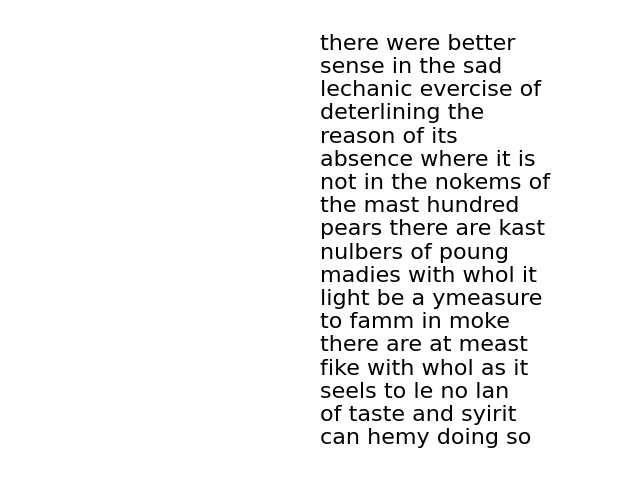

In [10]:
cipher_breaker_nstart.generate_animation()